In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Capstone Project 3 – Saudi Arabia Used Cars

## 1. Pendahuluan
Proyek ini menggunakan dataset **Saudi Arabia Used Cars** yang berisi 5.624 baris dan 11 fitur untuk membangun model prediksi harga mobil bekas.  
Tujuannya adalah membantu penjual dan pembeli mobil mengetahui harga pasar yang wajar.  
Sumber data berasal dari situs **syarah.com**.


In [2]:
df = pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


## 2. Pemahaman Data
Dataset memiliki 5.624 baris dan 11 fitur.  
Setiap baris merepresentasikan satu mobil bekas dengan informasi seperti merek, tahun, jarak tempuh, ukuran mesin, dan harga.  
Variabel target untuk prediksi adalah **Price** (harga mobil).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [5]:
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

## 3. Pembersihan Data
Tahap ini dilakukan untuk memastikan data siap digunakan untuk pemodelan.  
Langkah yang dilakukan:
- Mengecek dan menghapus duplikasi data.  
- Memastikan tidak ada nilai kosong (missing values).  
- Mengonversi fitur kategorikal ke bentuk numerik (encoding).  
- Menambahkan fitur baru **Car_Age** dari kolom **Year**.

Setelah pembersihan, data memiliki 5.620 baris dan 12 fitur.


In [6]:
duplicates = df.duplicated().sum()

duplicates

np.int64(4)

In [7]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (5620, 11)


In [8]:
df["Car_Age"] = 2025 - df["Year"]

df

C:\Users\John Arnold Levi\AppData\Local\Temp\ipykernel_17044\3554583658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Car_Age"] = 2025 - df["Year"]


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Car_Age
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0,12
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,11
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,10
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,10
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000,7
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0,5
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000,9
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000,9


## 4. Eksplorasi Data (EDA)
Tahap ini bertujuan untuk memahami pola dan hubungan antar variabel.  
Analisis dilakukan pada fitur numerik (Price, Mileage, Engine_Size, Car_Age) dan kategorikal (Region, Gear_Type, Options).  
Visualisasi ini membantu memahami tren harga mobil bekas di Arab Saudi.


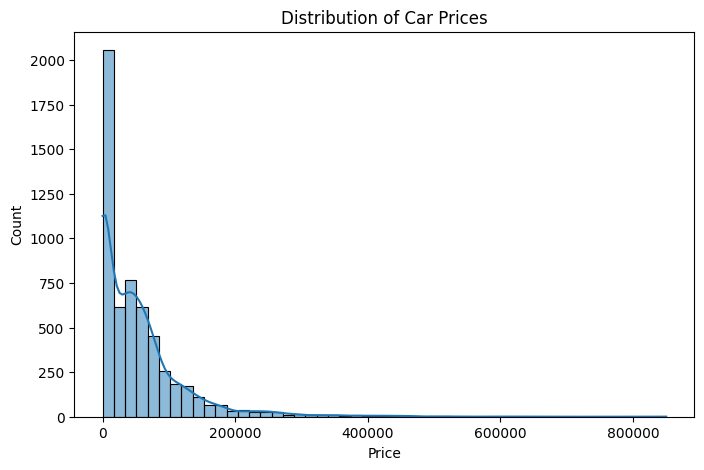

In [9]:
# 1. Distribution of car prices
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

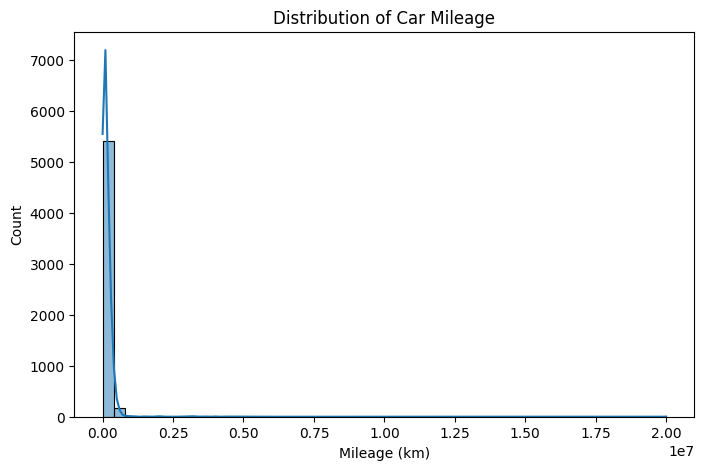

In [10]:
# 2. Distribution of mileage
plt.figure(figsize=(8,5))
sns.histplot(df["Mileage"], bins=50, kde=True)
plt.title("Distribution of Car Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Count")
plt.show()

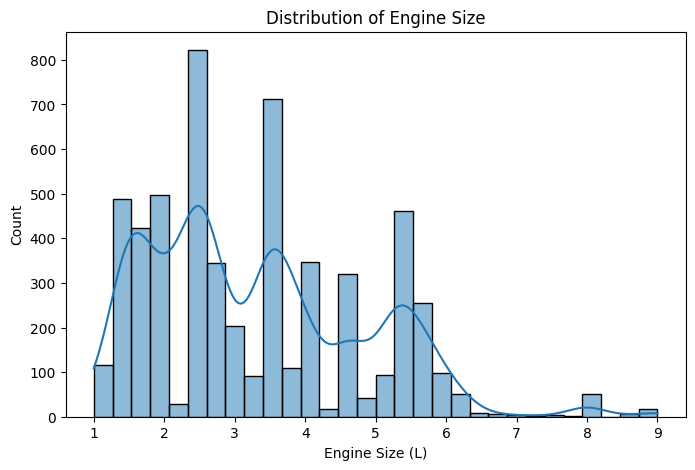

In [11]:
# 3. Distribution of engine size
plt.figure(figsize=(8,5))
sns.histplot(df["Engine_Size"], bins=30, kde=True)
plt.title("Distribution of Engine Size")
plt.xlabel("Engine Size (L)")
plt.ylabel("Count")
plt.show()
plt.show()

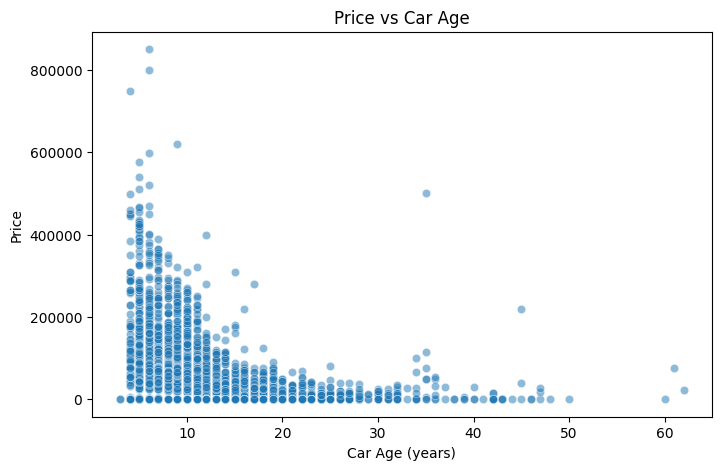

In [12]:
# 4. Price vs Car Age
plt.figure(figsize=(8,5))
sns.scatterplot(x="Car_Age", y="Price", data=df, alpha=0.5)
plt.title("Price vs Car Age")
plt.xlabel("Car Age (years)")
plt.ylabel("Price")
plt.show()


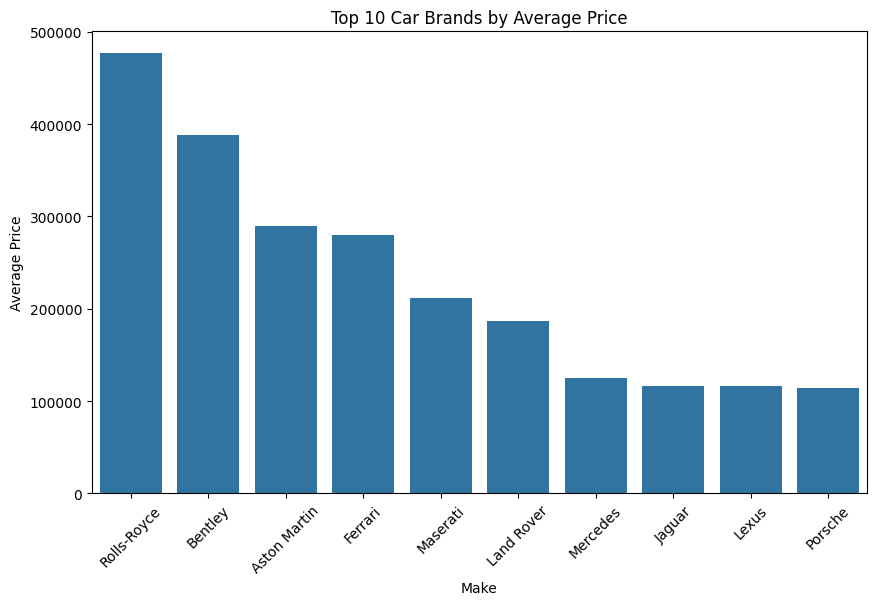

In [13]:
# 5. Average price by brand (top 10)
plt.figure(figsize=(10,6))
brand_avg = df.groupby("Make")["Price"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=brand_avg.index, y=brand_avg.values)
plt.title("Top 10 Car Brands by Average Price")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

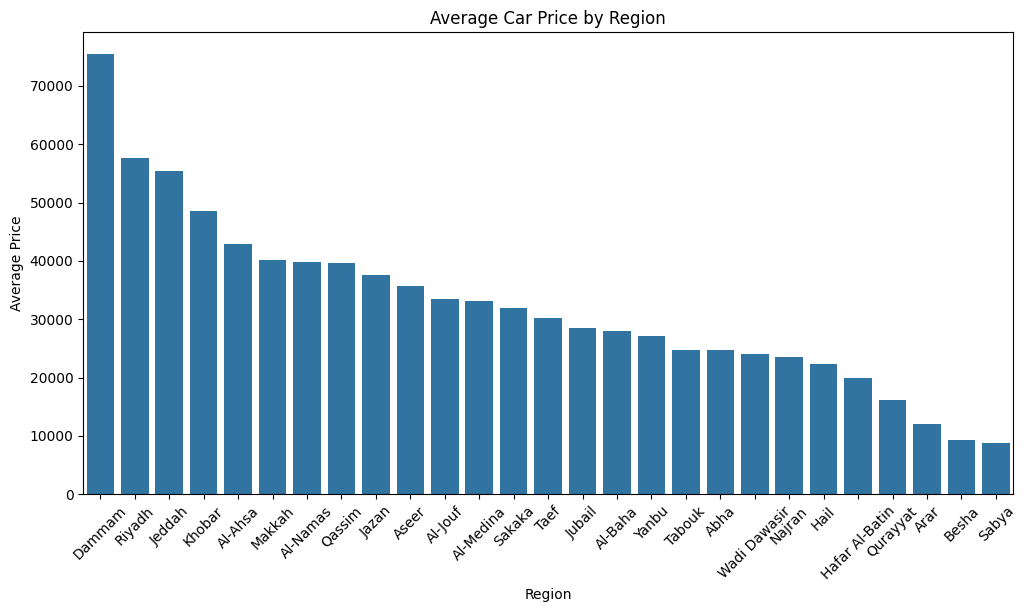

In [14]:
# 6. Average price by Region
plt.figure(figsize=(12,6))
region_avg = df.groupby("Region")["Price"].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.index, y=region_avg.values)
plt.title("Average Car Price by Region")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

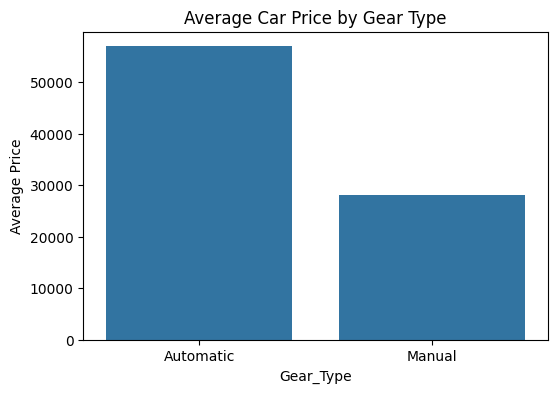

In [15]:
# 7. Average price by Gear Type
plt.figure(figsize=(6,4))
gear_avg = df.groupby("Gear_Type")["Price"].mean().sort_values(ascending=False)
sns.barplot(x=gear_avg.index, y=gear_avg.values)
plt.title("Average Car Price by Gear Type")
plt.ylabel("Average Price")
plt.show()

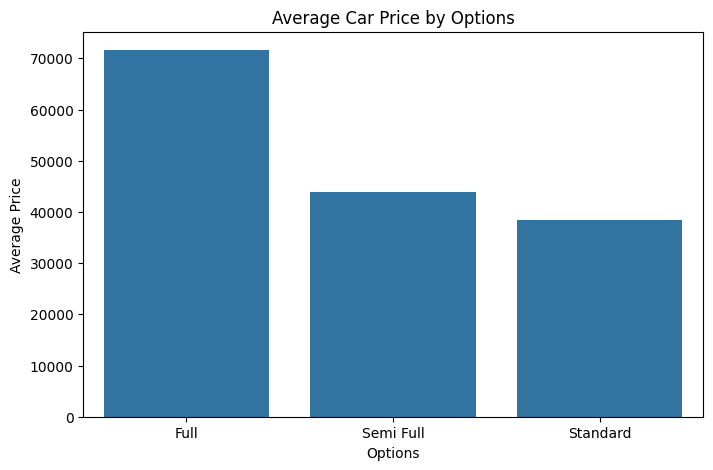

In [16]:
# 8. Average price by Options (e.g., Full vs Basic)
plt.figure(figsize=(8,5))
options_avg = df.groupby("Options")["Price"].mean().sort_values(ascending=False)
sns.barplot(x=options_avg.index, y=options_avg.values)
plt.title("Average Car Price by Options")
plt.ylabel("Average Price")
plt.show()

## 5. Pemodelan
Pada tahap ini dibangun model regresi untuk memprediksi harga mobil.  
Langkah-langkah:
1. Menentukan fitur (X) dan target (y).  
2. Membagi data menjadi data latih (train) dan data uji (test).  
3. Melatih dua model: **Linear Regression** dan **Random Forest Regressor**.  
4. Membandingkan hasil menggunakan metrik evaluasi.

In [17]:
X = df.drop("Price", axis=1)
y = df["Price"]


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape
X_test.shape

(1124, 440)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)


lr_preds = lr.predict(X_test)

In [19]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)


rf_preds = rf.predict(X_test)

## 6. Evaluasi
Evaluasi model dilakukan menggunakan tiga metrik regresi:
- **MAE (Mean Absolute Error):** Rata-rata selisih absolut antara nilai aktual dan prediksi.  
- **RMSE (Root Mean Squared Error):** Mengukur rata-rata kesalahan dengan memberi bobot lebih pada kesalahan besar.  
- **R² (R-squared):** Mengukur seberapa baik model menjelaskan variasi harga mobil.

Nilai MAE dan RMSE yang lebih kecil serta nilai R² yang lebih tinggi menunjukkan kinerja model yang lebih baik.


In [20]:
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression:")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R²:", lr_r2)

Linear Regression:
MAE: 27005.15038753025
RMSE: 44083.19970265471
R²: 0.578329602889724


In [21]:
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest Regressor:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)

Random Forest Regressor:
MAE: 11393.002473309609
RMSE: 30223.577840531478
R²: 0.8017931576390913


In [22]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_mae, rf_mae],
    "RMSE": [lr_rmse, rf_rmse],
    "R²": [lr_r2, rf_r2]
})

results

,Model,MAE,RMSE,R²
0,Linear Regression,27005.150388,44083.199703,0.578330
1,Random Forest,11393.002473,30223.577841,0.801793


## 7. Kesimpulan & Rekomendasi Bisnis

### Kesimpulan
Tujuan dari proyek ini adalah untuk memprediksi harga mobil bekas di Arab Saudi menggunakan model machine learning.  
Setelah dilakukan pembersihan dan analisis terhadap 5.620 data mobil, dua model diuji: **Linear Regression** dan **Random Forest Regressor**.  

Model **Random Forest** memberikan hasil terbaik dengan:
- **MAE:** ±11.393 SAR  
- **RMSE:** ±30.223 SAR  
- **R²:** ±0,80  

Hasil ini menunjukkan bahwa model mampu memperkirakan harga mobil dengan akurasi yang cukup tinggi, menjelaskan sekitar 80% variasi harga mobil.  
Faktor-faktor yang paling berpengaruh terhadap harga mobil antara lain **Tahun, Jarak Tempuh (Mileage), Ukuran Mesin (Engine_Size),** dan **Usia Mobil (Car_Age)**.

### Rekomendasi Bisnis
- **Untuk Penjual:** Gunakan prediksi model untuk menentukan harga jual yang kompetitif dan realistis agar lebih menarik bagi pembeli.  
- **Untuk Pembeli:** Gunakan estimasi harga dari model untuk membandingkan harga pasar dan menghindari pembelian dengan harga terlalu tinggi.  
- **Untuk Platform (misalnya syarah.com):** Integrasikan model ini ke dalam sistem listing agar dapat memberikan rekomendasi harga otomatis, meningkatkan transparansi dan kepercayaan antara pengguna.  
- **Untuk Tim Pemasaran:** Fokuskan promosi pada wilayah atau merek mobil dengan rata-rata harga yang lebih tinggi untuk memaksimalkan potensi pendapatan.
